In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
credit_data = pd.read_csv("./data/default_of_credit_card_clients.csv", sep=",")
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Create new variables
credit_data["median_Bill_amt"] = credit_data[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].astype(float).median(axis=1)

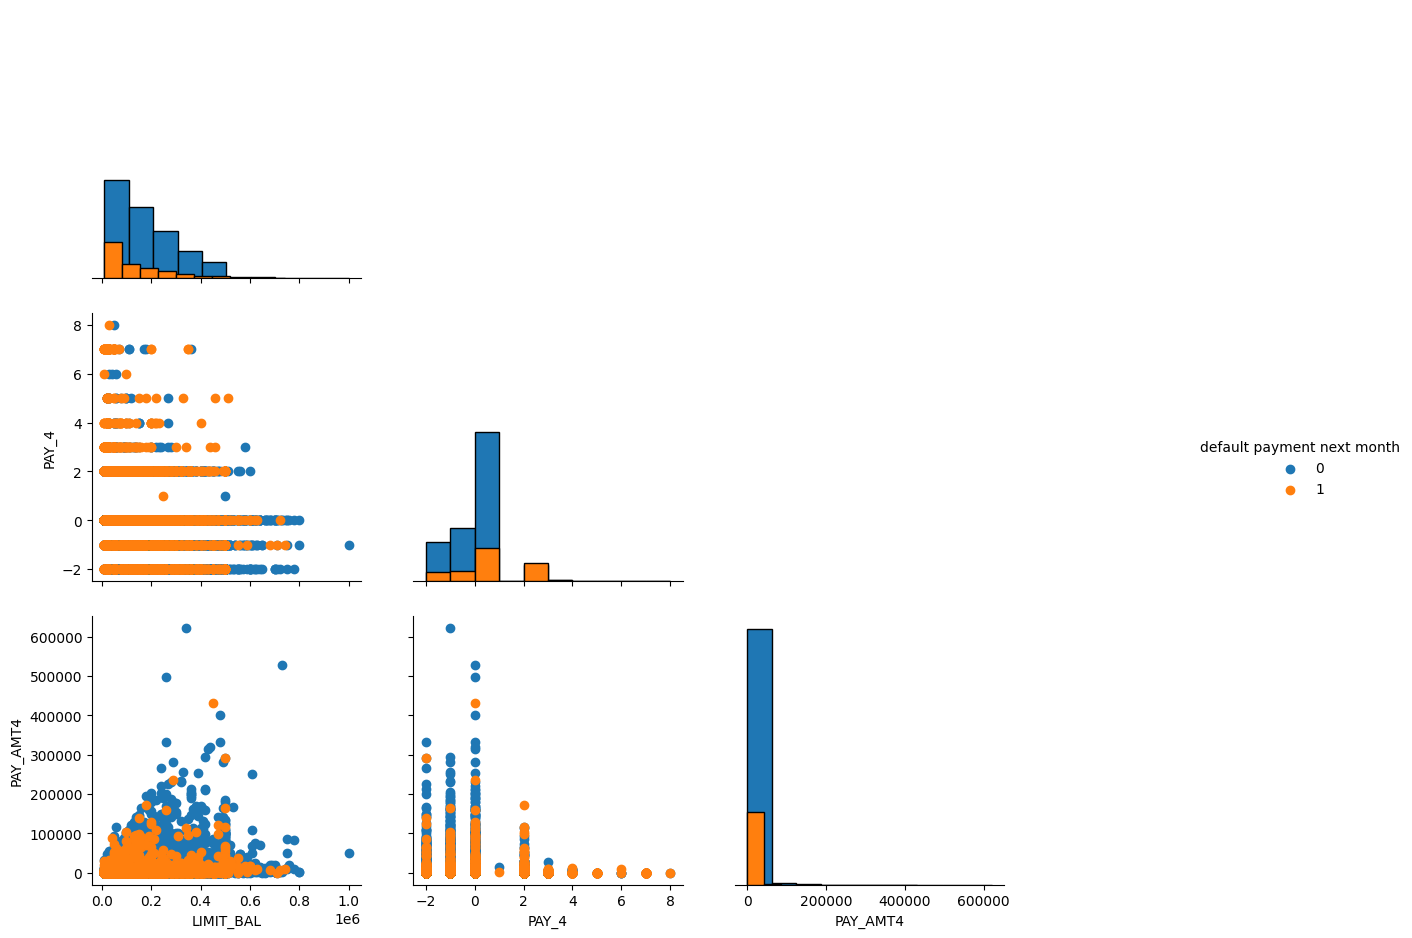

In [4]:
grid = sns.PairGrid(data= credit_data,hue = 'default payment next month',
                    vars = ['LIMIT_BAL','PAY_4','PAY_AMT4'], height = 2, corner = True)

grid = grid.map_lower(plt.scatter)
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k')
grid.add_legend()
grid.fig.set_size_inches(15,10)

Las personas que no entan en default pagan más cantidad en el mes 4 que las personas personas que entraran en default. Esto indica que la cantidad de dinero que se pague en el mes 4 marca una suave tendencia sobre su probabilidad de no entrar en default. No hay una diferencia entre las personas que entran en default y las que no con respecto a algún pago en en mes 4.
Debido a que la base de datos se encuentra desbalanceada, el histograma no arroja infromación importante para la frecuencia de las separaciones de las varibales continuas.

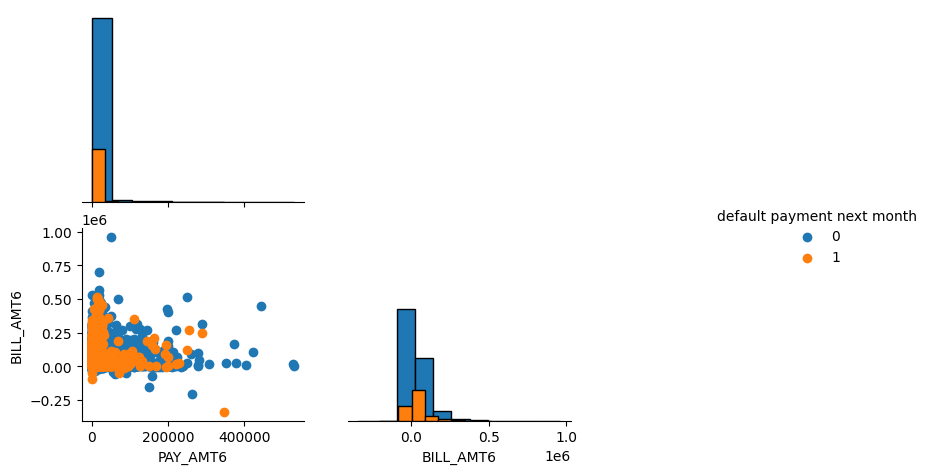

In [5]:
grid = sns.PairGrid(data= credit_data,hue = 'default payment next month',
                    vars = ['PAY_AMT6','BILL_AMT6'], height = 2, corner = True)

grid = grid.map_lower(plt.scatter)
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k')
grid.add_legend()
grid.fig.set_size_inches(10,5)

las personas que tiene bajas cantidad de dinero en la cuenta pero que pagan altas sumas de dinero tiene un compromiso por no entrar en default.

<Axes: title={'center': 'median_Bill_amt'}, xlabel='SEX'>

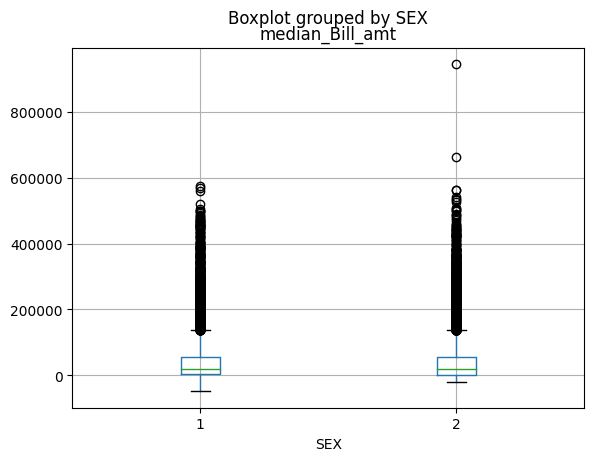

In [8]:
credit_data.boxplot(column='median_Bill_amt', by='SEX')

No hay una diferencia clara entre la cantidad de dinero pormedio que tiene en el status bancario entre los hombres y las mujeres en sus esta